In [174]:
!pip install tensorflow==2.13
import tensorflow as tf
from tensorflow import keras
from keras import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Error processing line 3 of /Users/divyamkumar/Library/Python/3.9/lib/python/site-packages/googleapis_common_protos-1.61.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 9.1 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: typi

In [156]:
PATH = '/Users/divyamkumar/Desktop/OCT-8/data'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print(total_test, total_val, total_train)

batch_size = 128
IMG_HEIGHT = 400
IMG_WIDTH = 400

200 16 17257


In [157]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary',
                    classes=['CNV', 'NORMAL'])
val_data_gen = validation_image_generator.flow_from_directory(
                    validation_dir,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=4,
                    class_mode='binary',
                    classes=['CNV', 'NORMAL'])
test_data_gen = test_image_generator.flow_from_directory(
                    PATH,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=20,
                    classes=['test'],
                    shuffle=False)

Found 17254 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 200 images belonging to 1 classes.


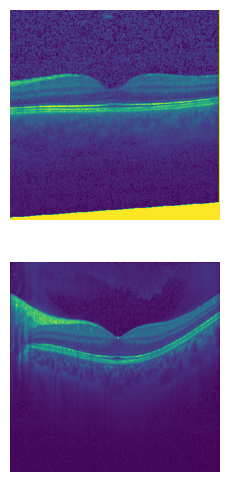

In [158]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:2])

Found 17254 images belonging to 2 classes.


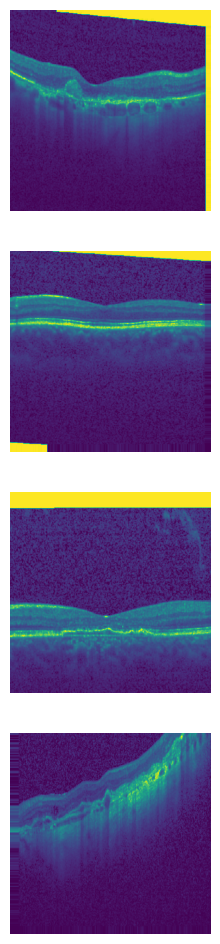

In [159]:
train_image_generator = ImageDataGenerator(
                        rescale=1./255,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=0.1
                        )

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    color_mode = "grayscale",
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary',
                    classes=['CNV', 'NORMAL'])

augmented_images = [train_data_gen[0][0][i] for i in range(4)]

plotImages(augmented_images)

In [160]:
# def recall(y_true, y_pred):
#     y_true = keras.ones_like(y_true)
#     true_positives = keras.sum(keras.round(keras.clip(y_true * y_pred, 0, 1)))
#     all_positives = keras.sum(keras.round(keras.clip(y_true, 0, 1)))

#     recall = true_positives / (all_positives + keras.epsilon())
#     return recall

# def precision(y_true, y_pred):
#     y_true = keras.ones_like(y_true)
#     true_positives = keras.sum(keras.round(keras.clip(y_true * y_pred, 0, 1)))

#     predicted_positives = keras.sum(keras.round(keras.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + keras.epsilon())
#     return precision

# def f1_score(y_true, y_pred):
#     precision = precision(y_true, y_pred)
#     recall = recall(y_true, y_pred)
#     return 2*((precision*recall)/(precision+recall+keras.epsilon()))


model = Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(Conv2D(32, (3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 398, 398, 32)      320       
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 199, 199, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 98, 98, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 flatten_21 (Flatten)        (None, 589824)          

In [161]:
history = model.fit(
            train_data_gen,
            steps_per_epoch=int(total_train/512),
            validation_data=val_data_gen,
            validation_steps=int(total_val/4),
            epochs=10
            )

Epoch 1/10
33/33 [==============================] - 570s 17s/step - loss: 0.7959 - accuracy: 0.5504 - val_loss: 0.5512 - val_accuracy: 0.8125
Epoch 2/10
33/33 [==============================] - 471s 14s/step - loss: 0.6239 - accuracy: 0.6532 - val_loss: 0.5365 - val_accuracy: 0.5625
Epoch 3/10
33/33 [==============================] - 879s 27s/step - loss: 0.5445 - accuracy: 0.7237 - val_loss: 0.2837 - val_accuracy: 0.9375
Epoch 4/10
33/33 [==============================] - 635s 19s/step - loss: 0.4084 - accuracy: 0.8223 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 5/10
33/33 [==============================] - 729s 22s/step - loss: 0.3743 - accuracy: 0.8374 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 6/10
33/33 [==============================] - 540s 16s/step - loss: 0.2975 - accuracy: 0.8759 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 332s 10s/step - loss: 0.2290 - accuracy: 0.9098 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 

In [184]:
probabilities = model.predict(test_data_gen).flatten()

10/10 [==============================] - 2s 201ms/step


In [186]:
def check(probabilities):
  answers =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1
              ]

  correct = 0

  for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
      correct +=1

  percentage_identified = (correct / len(answers)) * 100


  print(f"Your model correctly identified {round(percentage_identified, 3)}% of the images of CNV and NORMAL OCTs.")
check(probabilities)

Your model correctly identified 97.959% of the images of CNV and NORMAL OCTs.


In [192]:
loc = "/Users/divyamkumar/Desktop/OCT-8/model.keras"
model.save(loc)

In [193]:
model1 = keras.models.load_model(loc, compile=False)
model1.compile(model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/divyamkumar/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yj/57h5hr6n13l01cflp30m9q_00000gn/T/ipykernel_8298/389892480.py", line 2, in <module>
    model1.compile(model.compile(optimizer='adam',
  File "/Users/divyamkumar/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/divyamkumar/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/__init__.py", line 327, in get
ValueError: Could not interpret optimizer identifier: None

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/divyamkumar/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.Inte

In [194]:
probabilities21 = model1.predict(test_data_gen).flatten()
check(probabilities21)

10/10 [==============================] - 4s 374ms/step
Your model correctly identified 97.959% of the images of CNV and NORMAL OCTs.
